# Notas de aula do curso de Estatística parte 4:

## Correlação e Regressão

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
dados = pd.read_csv("./dados/dados.csv")
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [4]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


# Aula 1: Rodando um regressão linear

Y = Gastos das famílias

X = Rendas das famílias

In [5]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [6]:
#passando para um DataFrame
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [7]:
dataset.shape

(50, 2)

In [8]:
dataset.describe()

,Y,X
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       50 non-null     int64
 1   X       50 non-null     int64
dtypes: int64(2)
memory usage: 928.0 bytes


<AxesSubplot:title={'center':'Box plot'}, xlabel='Gastos das famílias (R$)'>

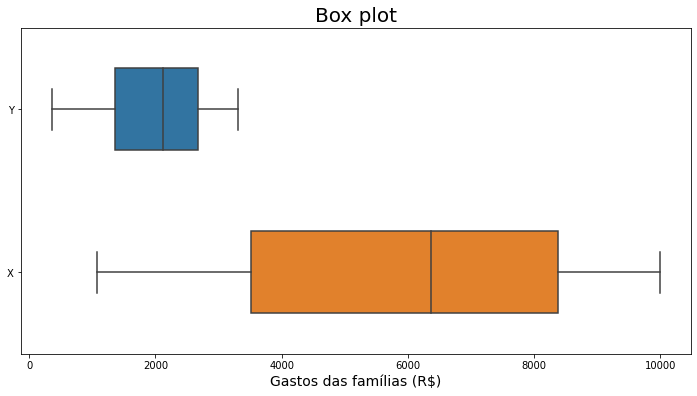

In [10]:
#Fazendo boxplot
ax = sns.boxplot(data=dataset, orient = "h", width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Box plot", fontsize = 20)
ax.set_xlabel("Gastos das famílias (R$)", fontsize=14)
ax

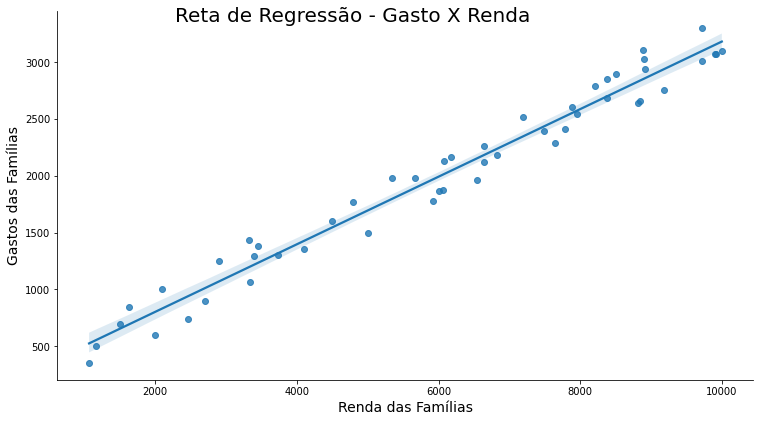

In [11]:
#Fazendo um novo tipo de gráfico de relação de rendas
ax = sns.lmplot(data=dataset, x = "X", y = "Y")
ax.fig.set_size_inches(12,6)
ax.fig.suptitle("Reta de Regressão - Gasto X Renda", fontsize =20)
ax.set_xlabels("Renda das Famílias", fontsize =14)
ax.set_ylabels("Gastos das Famílias", fontsize=14)
ax

Esse gráfico mostra a forma linear do conjunto de dados.

A documentação dessa função é [essa](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

Ele pega a reta média formada pelo conjunto de pontos.

Por mais que possamos fazer dessa forma, tem outras maneiras que iremos aprender a mexer com isso.


Iremos aprender a estimar essa reta.


-----

Então vamos ver como fazer a análise de correlação entre dois dados:

In [12]:
#Função do pandas
dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


Essa função mostra de fato a correlação das duas dado a dado. Como é colocado numa tabela é óbvio que as diagonais que não a correlação do dado com ele mesmo dará 1, contudo as laterais que o mesmo não pode ser dito. o valor de correlação entre X e Y é de 0.98, ou seja é muito próximo, porém não é prefeito.

---

Vamos então import um modelo para fazer a estimativa da regressão linear.

In [13]:
import statsmodels.api as sm

In [14]:
#Criando duas variáveis para a função
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [15]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [16]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


A função add_constant do statsmodels adiciona uma coluna com um valor fixo em 1.0 ao lado da coluna de dados que a gente deseja. No nosso caso foi o dataset.X.

Uma explicação do porquê que fizemos isso será dado no futuro.

---

### Estimação do modelo.

In [17]:
resultado_regressao = sm.OLS(Y, X).fit()

In [18]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.56e-38
Time:                        09:06:53   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

Achei muito bom esse modo fit, que mostra todo os modelos e dados estatístico que podemos utilizar, desde desvio padrão, até p-value e vários outros.

Mostra quantos números foram observados e quantos e qual data que foi feito.

In [19]:
#Obtendo previsões dentro da amostra.
dataset["Y_previsto"] = resultado_regressao.predict()
dataset

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


Então esse seria o último passo, da capacidade de predizer os valores aproximados, com algum grau de erro, para poder refazer a regressão.

Mas agora vamos fazer o passo a passo para entender melhor.

# Aula2: Correlação

Antes de falar da correlação em si, vamos entrar no tópico da Covariância, ou variância conjunta, que é a media do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

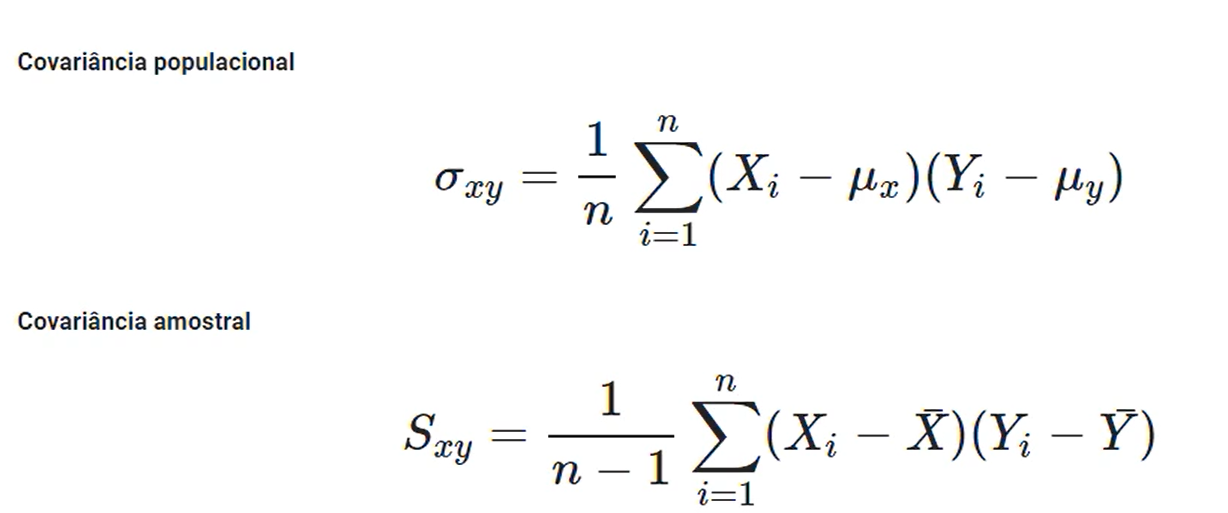

Mas cuidado!
Covariância não implica na causalidade entre ambas as variáveis, só mostra a relação entre as duas em relação aos dados, mas não quer dizer correlação. Tem que ter uma teoria por trás para ter uma causalidade.



Gerando uma amostra aleatória para facilitar o entendimento:

In [20]:
amostra = dados.query('Renda < 5000').sample(n=20, random_state= 101)

Obtendo a matriz da covariância:

In [21]:
amostra[["Idade", "Renda", "Anos de Estudo", "Altura"]].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


In [22]:
amostra.Idade.var()

134.4105263157895

Uma coisa da covariância que é difícil de lidar é que geralmente quando vemos um número grande já assumimos valores que estão discrepantes e tomamos lados já de cara. Contudo para a covariância esses valores grandes dependendem dos valores do conjunto de dados! Ou melhor, das unidades de medidas utilizadas. 

A gente não consegue dimensionar a intensidade da relação das variáveis utilizando a covariância porque ela é influenciada pelas unidades de medida das variáveis.

Podemos ver na tabela acima que os resultados variam bastante pois os dados de cada um são diferentes um dos outros.

Isso é lidado de forma melhor na correlação, que é limitado a valores entre -1 e 1.

### Interpretação de covariância.

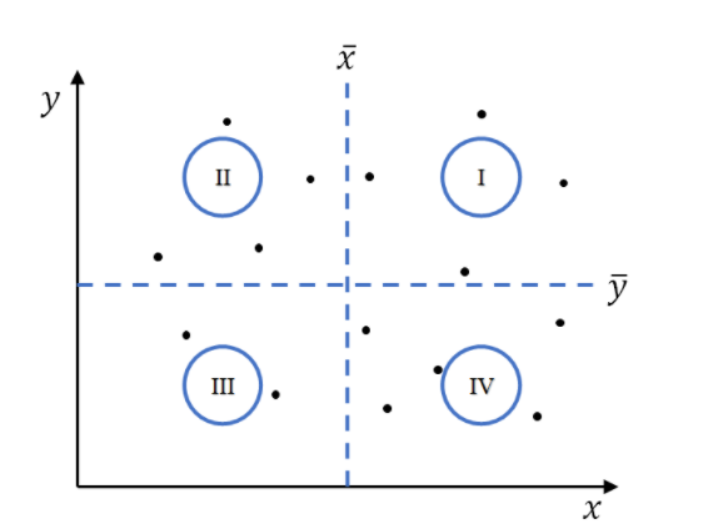

Em uma associação linear positiva, o valor positivo, a gente vai ter mais representantes nesse primeiro e no terceiro quadrante. A gente consegue visualizar graficamente esse tipo de comportamento, aqui também.

No caso de uma associação linear negativa, teremos valores mais expressivos nesses dois quadrantes, no segundo e no quarto. E aqui, existe uma confusão que as pessoas acham que, nesse caso, é quando X cai e Y também cai, não! Estamos falando justamente da positiva, quando ele aumenta, o outro aumenta, quando ele cai, o outro cai também. Isso é positiva. 

Nesse caso aqui, da negativa, quando o valor da covariância é negativo, isso indica que quando o valor de X aumenta, o de Y cai. Essa que é a relação, é contrária.

Ou seja, valor positivo indica relações na mesma direção e um negativo indica uma relação contrária, direções opostas, um sobe e o outro desce. E quando a gente tem um Sxy aqui, que é nossa covariância, muito próximo de 0, isso indica que os valores estão dispersos aqui entre todos os quadrantes, distribuídos aleatoriamente entre todos os quadrantes.

Isso indica que não existe uma relação clara, linear, entre as duas variáveis que estamos estudando, perfeito?

Então vamos lá, essa interpretação já se aplica praticamente no mesmo jeito para correlação que nós veremos, só que lá, conseguimos medir a intensidade, tá bom? Vamos estudar isso em breve. 

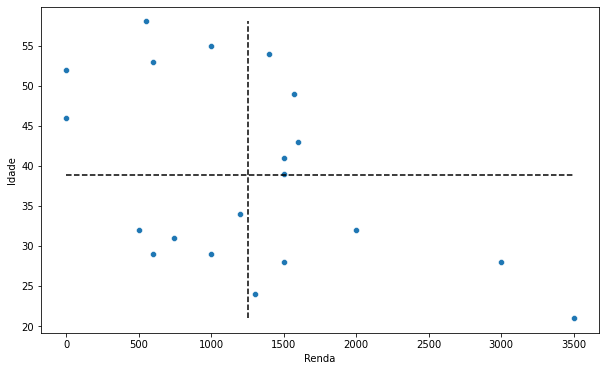

In [23]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

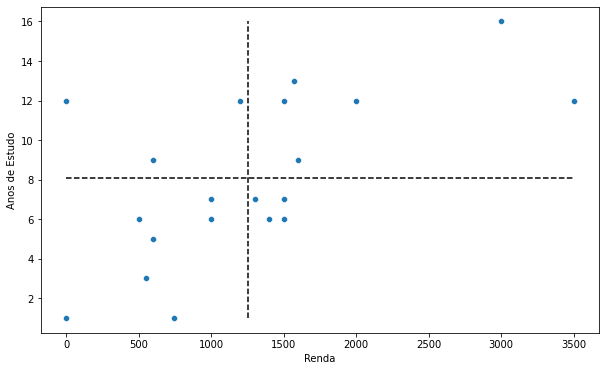

In [24]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

No primeiro scatterplot, vemos um caso de associação negativa! Podemos ver isso pela tabela de covariância entre a renda e a idade, sendo sua covariância negativa, vemos que maior parte dos ponto está no segundo e quarto quadrante.

Já no segundo scatterplot, vemos uma situação de associação positiva que sabemos que a covariância entre os Anos de estudo e a Renda se comportam de forma mais semelhante. Maior parte dos pontos se encontram no primeiro e terceiro quadrante.

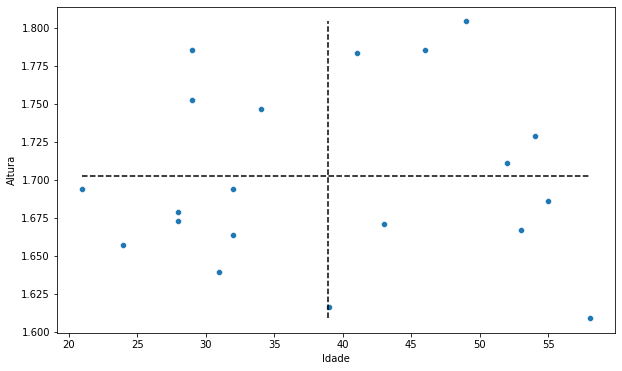

In [25]:
x = amostra.Idade
y = amostra.Altura

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

Por fim temos o último exemplo dado que mostra o scatterplot com a variância entre Idade e Altura, que sua covariância é muito próxima de zero. Como foi falado, isso implica na dispersão dos pontos por todos os quadrantes, não tendo nenhum padrão entre duplas de quadrantes.

>    Observação Importante:

>    Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.

>    Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.


Agora partiremos para a correlação, começando com a ideia do coeficiente de correlação de Pearson.

Com esse coeficiente conseguimos medir a intensidade da relação linear, se ela é mais forte ou se ela é mais fraca, vendo numericamente aqui. Esse cara, esse coeficiente ele vai variar de -1 a 1, eu já tinha falado isso antes, onde perto desses extremos, -1 e 1, indicam relações mais fortes entre as duas variáveis, relações lineares.

Então, a forma de calcular é com essas duas fórmulas aqui, onde essa letra do alfabeto grego, conhecida como "Rô", é o coeficiente de correlação entre X e Y, que vai ser igual a covariância entre X e Y, dividido pelo produto do desvio padrão dessas duas variáveis.

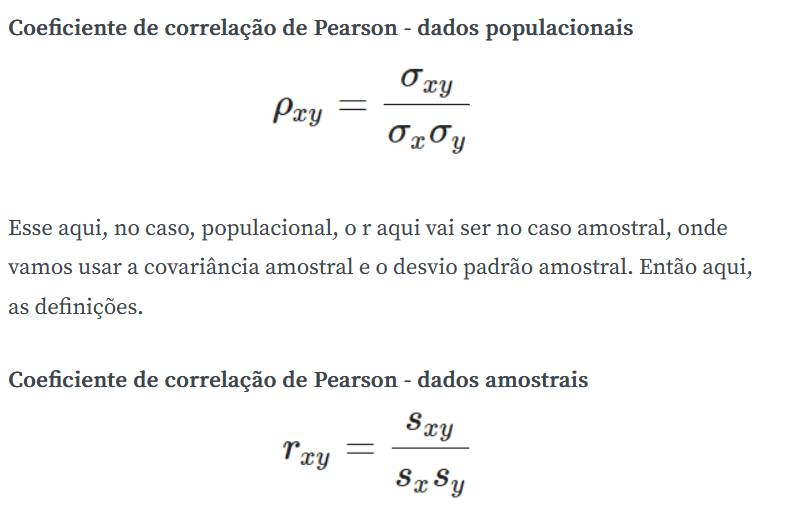


Então só pela prática vamos ver como calcula na mão, pois na verdade depois só aplicaremos aquela função que utilizamos no começo.

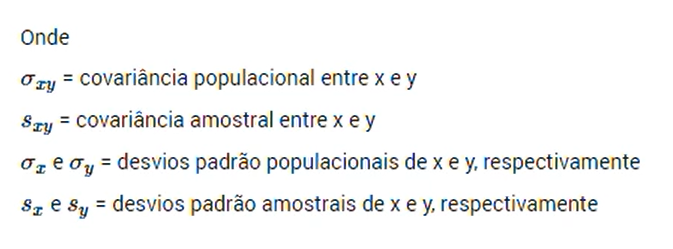

In [26]:
#Obtendo a covariância:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [27]:
s_xy = s_xy.Altura.loc['Renda']
s_xy

-1.0789639314252717

In [28]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

In [29]:
r_xy = s_xy/(s_x*s_y)
r_xy

-0.004072608143400288

Agora vamos obter esse mesmo valor utilizando a biblioteca do pandas direto.

In [30]:
dados[['Altura', 'Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


Podemos notar que o valor fora da diagonal dessa matriz é o mesmo que haviamos encontrado anteriormente.

In [31]:
dataset[['X', 'Y']].corr()

,X,Y
X,1.000000,0.984835
Y,0.984835,1.000000


No primeiro caso vemos um valor negativo, muito próximo de zero, logo a correlação é muito pequena, tendo uma dispersão de pontos muito grande.

Já no segundo caso temos uma correlação positiva muito próximo de um, implicando numa associação positiva muito forte, quase como se fosse uma linha.

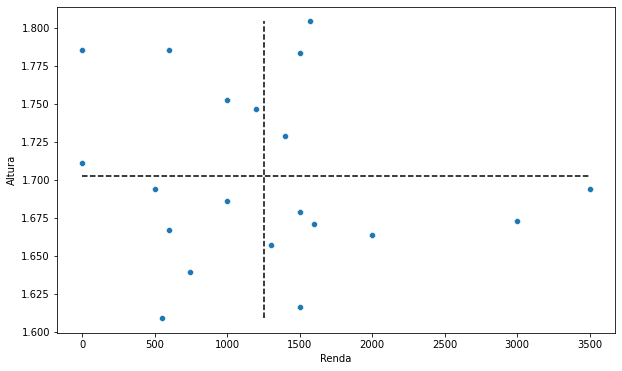

In [32]:
# Refazendo os quadros para esses dois exemplos, mostrando o caso disperso.
x = amostra.Renda
y = amostra.Altura

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

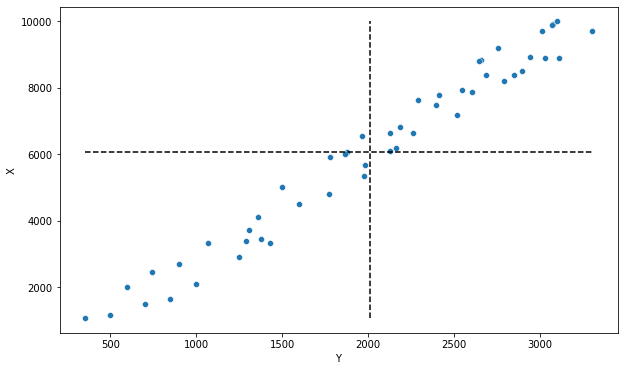

In [33]:
# Agora a gente vê esse resultado do caso de associação positiva.
x = dataset.Y
y = dataset.X

ax = sns.scatterplot(x=x, y=y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

In [34]:
#exerc
sigma_XY = 2178803.59
sigma_X_2 = 7328865.85
sigma_Y_2 = 667839.78

sigma_X = np.sqrt(sigma_X_2)
sigma_Y = np.sqrt(sigma_Y_2)

r_XY = sigma_XY / (sigma_X * sigma_Y)
print('Correlação ->', r_XY.round(4))

Correlação -> 0.9848


# Aula3: Regressão Linear

A análise de regressão diz a respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

**Terminologia**

    A variável que é prevista é conhecida como variável dependente(_Y_);
 
    A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (_X_);
    
    
Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## Regressão Linear simples

**Função Consumo**

Um economista do passado, não vou nem falar o nome dele, ele iniciou os estudos, ele analisou que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente, essa teoria é um pouco mais complexa, a gente vai usar essa forma mais simples para entender o nosso processo aqui. 

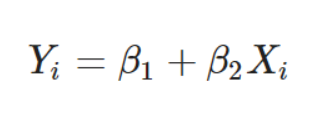

Onde 
* ${Y_i}$ é o gasto das famílias ou consumo das famílias;
* ${X_i}$ é a renda disponível;
* ${\beta_1}$ é conhecido como intercepto( no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)
* ${\beta_2}$ é o coeficiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros ${\beta_1}$ e ${\beta_2}$ com base nas observações de ${Y}$ e ${X}$.

In [35]:
#Carregando o dataset
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [36]:
dataset = pd.DataFrame(dataset)
dataset.head()

,Y,X
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


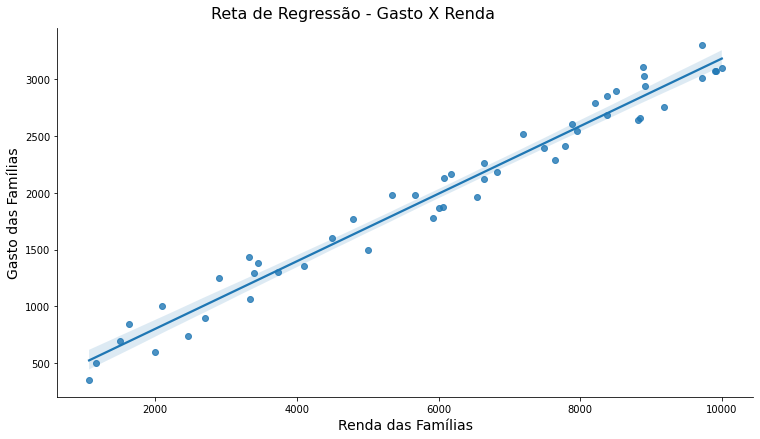

In [37]:
#Verificando se existe uma relação linear através do gráfico
ax = sns.lmplot(x="X", y="Y", data=dataset)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Gasto X Renda', fontsize=16, y=1.02)
ax.set_xlabels("Renda das Famílias", fontsize=14)
ax.set_ylabels("Gasto das Famílias", fontsize=14)
ax

In [38]:
#Fazendo a matriz de correlação

dataset.corr()

,Y,X
Y,1.000000,0.984835
X,0.984835,1.000000


### Função de regressão populacional

A equaçaõ formulada acima é conhecida como **função de regressão populacional(FRP)** e em alguns livros é também representada da seguinte forma:

${E(Y|X_i) = \beta_1 + \beta_2X_i}$

Ela afirma que o valor esperado da distribuição de ${Y}$, dado ${X_i}$, tem uma relação funcional com ${X_i}$, isto é, a resposta média de ${Y}$ varia com ${X}$. Os coeficientes ${\beta_1}$ e ${\beta_2}$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.


Esperança Condicional é o ${E(Y|X_i)}$. O desvio individual de cada ponto ${Y_i}$ nós damos por 

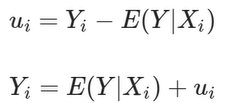

onde esse desvio ${u_i}$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também conhecida como termo de erro estocástico.

Observe que a podemos representar a FRP em sua forma estocástica da seguinte forma:

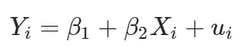


## Método de mínimos quadrados

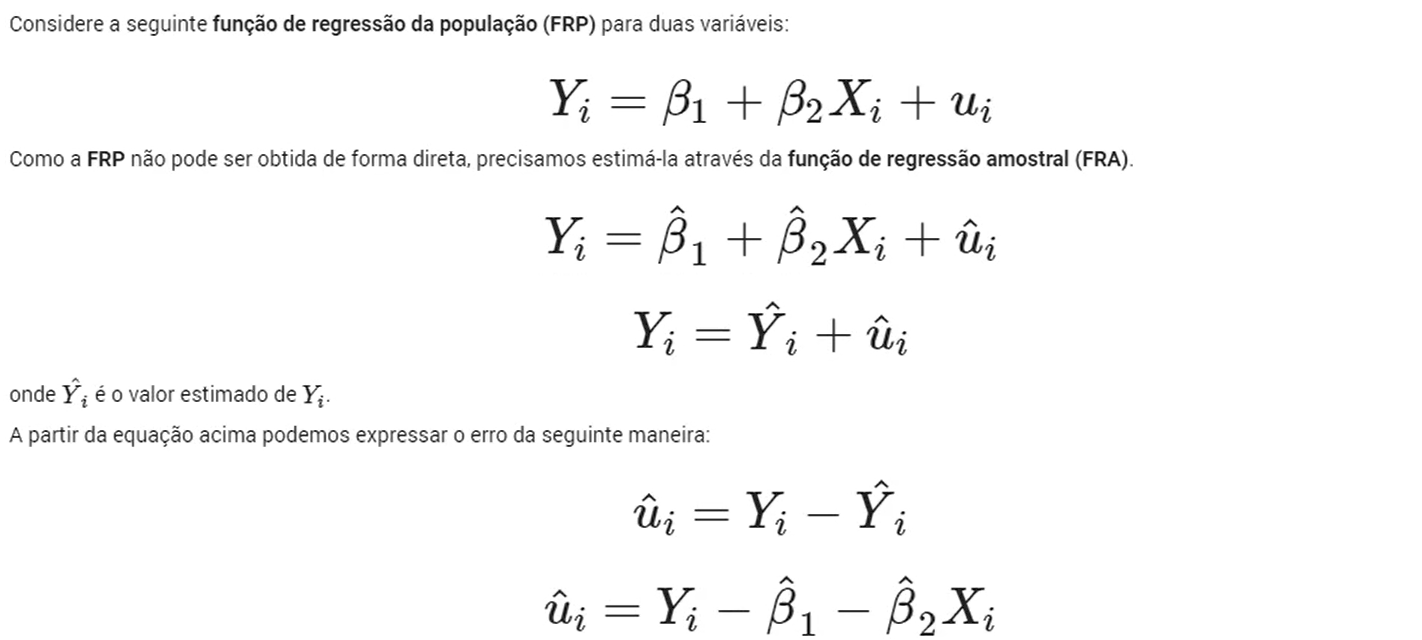

O problema de lidar com essa forma direta é que começamos a tratar cada um dos pontos, ou instâncias, como se tivessem o mesmo peso, contudo quanto maior for o valor de ${\hat u_i}$, maior será seu peso. A forma de lidar com isso é elevar tudo ao quadrado.

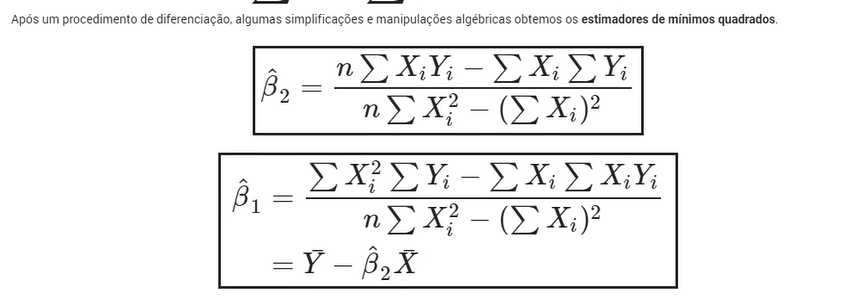

Daqui ele faz o processo de calcular pelo Método de Mínimos quadrados na mão. Acha o valor de todas as somatórias e aplicar na fração e retorna com o resultado. (Lembro que fiz muito isso na física)

Daqui não farei o processo na mão, só farei o caso que ele pega e aplica numa função que dá o resultado.

Obs: Detalhes interessantes que ele fez no desenvolvimento na mão:
Utilização de drop para tirar colunas, deixando explícito que quer tirar coluna com o axis.

E outra coisa interessante é que ao invés de criar colunas para depois fazer a soma ele utiliza do apply que fará o cálculo com a função lambda e depois soma.

In [39]:
# SOMA_XY = dataset.apply(lambda data: data.X * data.Y, axis = 1).sum()
# dataset.drop(['X2', 'XY'], axis = 1, inplace = True)

Agora utilizaremos o StatsModels para nos entregar um resultado mais rápido, uma função que faz tudo isso aí para a gente.

In [40]:
import statsmodels.api as sm

In [41]:
Y = dataset.Y
X = sm.add_constant(dataset.X)

In [42]:
Y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: Y, dtype: int64

In [43]:
X.head()

,const,X
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


De forma geral, tem função que faz o método de mínimos quadrados que já traz essa coluna de constante, que toma o valor igual a um. Contudo do jeito atual que estamos fazendo, é necessário esse passo.

Depois disso aplicamos a função OLS que pega como parâmetro as duas colunas, e depois o missing que faz que casos que umas das colunas não tenha o dado correspondente já tira esse registro para evitar erros.

In [44]:
resultado_regressao = sm.OLS(Y, X, missing = 'drop').fit()

In [45]:
#Visualização de parâmetros
resultado_regressao.params

const    207.903314
X          0.297291
dtype: float64

Const é a constante e X é a inclinação da reta (Coeficiente angular).

In [46]:
#Intervalo de confiança para os parâmetros estimados:

#A utilização do parametro da função de conf_int não é necessário pois é setado como padrão
# mas é bom ter noção dele.

resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,107.116864,308.689763
X,0.282092,0.312490


In [47]:
#exercicio
dataset_ex = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}
dataset_ex = pd.DataFrame(dataset_ex)

Y_ex = dataset_ex.Y
X_ex = sm.add_constant(dataset_ex.X)

resultado_regressao_ex = sm.OLS(Y_ex, X_ex, missing='drop').fit()
resultado_regressao_ex.params

const   -168.321156
X        481.390397
dtype: float64

## Obtendo Previsões:

In [48]:
beta_1 = resultado_regressao.params[0]
beta_2 = resultado_regressao.params[1]

In [49]:
dataset['Y_previsto'] = beta_1+beta_2*dataset.X

In [50]:
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [51]:
#Mostrando que existe uma função que faz exatamente isso
dataset['Y_previsto_statsmodels'] = resultado_regressao.predict()
dataset.head()

,Y,X,Y_previsto,Y_previsto_statsmodels
0,3011,9714,3095.785086,3095.785086
1,1305,3728,1316.203010,1316.203010
2,1879,6062,2010.079483,2010.079483
3,2654,8845,2837.439476,2837.439476
4,2849,8378,2698.604723,2698.604723


In [52]:
#Tirando a coluna extra
dataset.drop(['Y_previsto_statsmodels'], axis = 1, inplace = True)
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


Estimaremos gastos agora do conjunto de forma que seja de forma da amostra. Tanto de forma que nós faremos a previsão quanto com o statsmodels.

In [53]:
#Fazendo na mão
def prever(x):
  return beta_1 + beta_2 * x

In [54]:
#Basta colocar a amostra X como parâmetro
prever(7510)

2440.556403140435

In [55]:
#Via statsmodels
resultado_regressao.predict([1,7510])

array([2440.55640314])

Temos que colocar como lista com o 1 na frente pois lembre que a variável X para o resultado_regressao é um dataset com duas colunas, uma constante de 1 e outro o valor de fato. Precisa desse um para que retorne o valor correto.

In [56]:
#Pegando só o valor
resultado_regressao.predict([1,7510])[0]

2440.5564031404356

In [57]:
#exercício
resultado_regressao_ex.predict([1, 2.345678])[0]

960.8657076138517

# Aula4: Testando os resultados.

## Resíduos
Como vimos anteriormente, o resíduo é a diferença do resultado do valor observado da nossa variável dependente e do valor estimado da nossa variável dependente. 

Vamos fazer o cálculo do resíduo de duas formas, na mão e com o stats models.

In [58]:
dataset.head()

,Y,X,Y_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723


In [59]:
dataset['u'] = dataset.Y - dataset.Y_previsto
dataset.head()

,Y,X,Y_previsto,u
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [60]:
dataset['Residuo'] = resultado_regressao.resid
dataset.head()

,Y,X,Y_previsto,u,Residuo
0,3011,9714,3095.785086,-84.785086,-84.785086
1,1305,3728,1316.203010,-11.203010,-11.203010
2,1879,6062,2010.079483,-131.079483,-131.079483
3,2654,8845,2837.439476,-183.439476,-183.439476
4,2849,8378,2698.604723,150.395277,150.395277


In [61]:
#Tirando a coluna u
dataset.drop(['u'], axis=1, inplace=True)
dataset.head()

,Y,X,Y_previsto,Residuo
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


### Suposições sobre o termo _u_
1. O termo de erro _u_ é uma variável aleatória com média igual a zero: ${E(u) = 0}$

2. A variância de _u_ é a mesma para todos os valores de X

3. Os valores de _u_ são independentes

4. O termo de erro _u_ é uma variável aleatória normalmente distribuída

<AxesSubplot:title={'center':'Resíduos vs Variável Independente'}, xlabel='X', ylabel='Resíduos'>

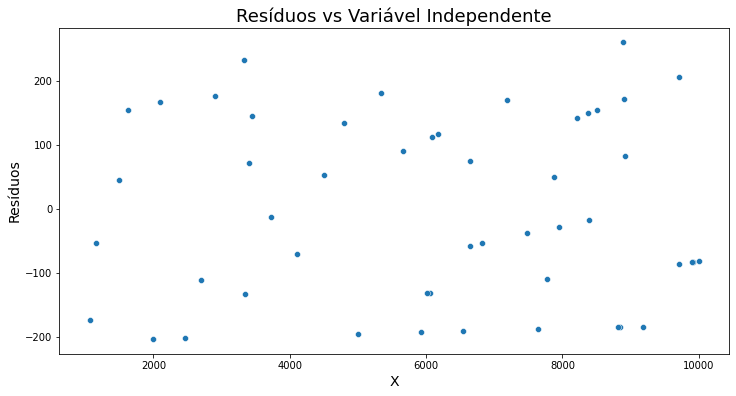

In [62]:
#Plottando os resíduos do modelo:
ax = sns.scatterplot(x=dataset.X, y=dataset.Residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

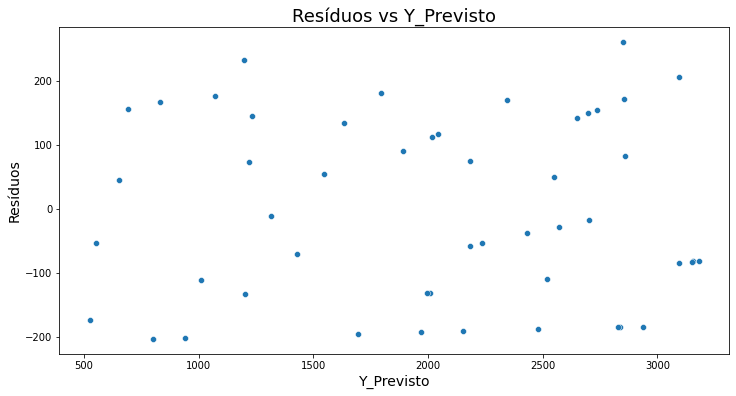

In [63]:
#Vendo a dispersão dos resíduos em relação a previsão feita de Y
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

A forma de verificar se a variância é constante, basta elevar o residuo ao quadrado e fazer um gráfico de scatterplot dele com o y previsto, e verificar como fica no gráfico, caso seja algo linear já implica na consstância, caso contrário, um cone, curvas... Já não é mais.

<AxesSubplot:title={'center':'Resíduos² vs Y_Previsto'}, xlabel='Y_Previsto', ylabel='Resíduos'>

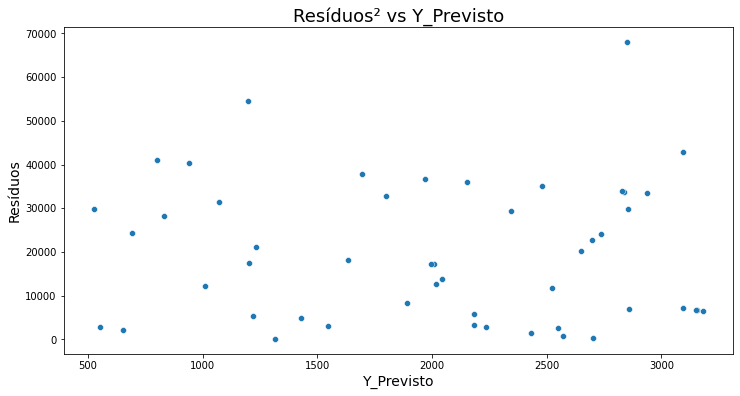

In [64]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuo**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

(tem uma linha na parte debaixo)

## Coeficiente de determinação _R²_

O coeficiente de determinação _R²_ é uma meidda resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:
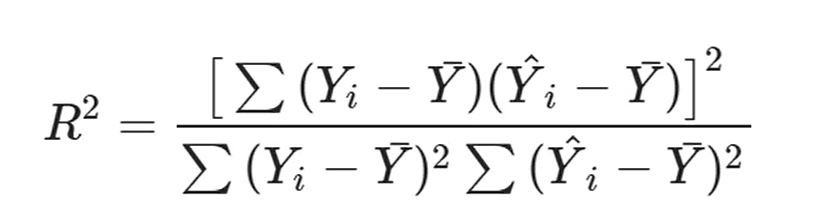

SQE = Soma dos quadrados dos erros
SQT = Soma dos quadrados Total
SQR = Soma dos quadrados da Regressão

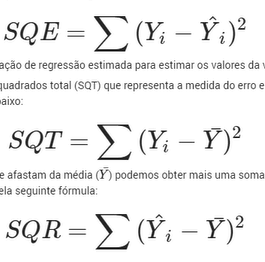

In [65]:
#Duas formas de fazer
dataset.head()

,Y,X,Y_previsto,Residuo
0,3011,9714,3095.785086,-84.785086
1,1305,3728,1316.203010,-11.203010
2,1879,6062,2010.079483,-131.079483
3,2654,8845,2837.439476,-183.439476
4,2849,8378,2698.604723,150.395277


In [66]:
SQE = dataset.Residuo.apply(lambda u: u**2).sum()
SQE

984986.0375191914

In [67]:
#Pelo statsmodels
resultado_regressao.ssr

984986.0375191914

In [68]:
SQT = dataset.Y.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQT

32724149.279999997

In [69]:
SQR = dataset.Y_previsto.apply(lambda y: (y - dataset.Y.mean())**2).sum()
SQR

31739163.24248083

In [70]:
#ou
resultado_regressao.ess

31739163.242480807

Detalhe: ${SQT = SQR + SQE}$

In [71]:
SQT

32724149.279999997

In [72]:
int(SQR)

31739163

In [73]:
int(SQT) == int(SQE)+int(SQR)

True

O Coeficiente de determinação se dá entre valores de 0 a 1.
Ele é a razão entre SQR por SQT. Sendo que quando SQE vai a zero, e temos a regressão estimada perfeita, o coeficiente vai a 1, e quando SQE vai aumentando, o coef vai para zero.
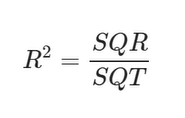

In [74]:
r2 = SQR/SQT
r2

0.9699003317369304

In [75]:
resultado_regressao.rsquared

0.9699003317369297

OBS:
Somente com a utilização de R² não é possível tirar conclusões sobre a relação entre Y e X ser ou não ser estatisticamente significante. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [76]:
#exercicio
dataset_ex = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

dataset_ex = pd.DataFrame(dataset_ex)

Y_ex = dataset_ex.Y
X_ex = sm.add_constant(dataset_ex.X)

resultado_regressao_ex = sm.OLS(Y_ex, X_ex, missing='drop').fit()
resultado_regressao_ex.rsquared

0.9967917066613234

## Erro Quadrático médio

In [77]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.56e-38
Time:                        09:06:56   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

Lembre-se que a soma dos quadrados do erros (SQE) pe uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudads anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos n-2 graus de liberdade.

O erro quadrático médio obtém-se dividindo SQE por n-2

In [78]:
n=50
EQM = SQE/(n-2)
EQM

20520.542448316486

In [79]:
EQM = resultado_regressao.mse_resid
EQM

20520.542448316486

Usaremos esse valor para fazer nossas estatísticas de teste.

### Teste de significância de parâmetros

Utilização do teste bicaudal e teste t também.

In [80]:
s = np.sqrt(resultado_regressao.mse_resid)
s

143.24993001155877

In [81]:
SOMA_DESVIO2 = dataset.X.apply(lambda x: (x - dataset.X.mean())**2).sum()
SOMA_DESVIO2

359114426.5

In [82]:
s_beta_2 = s / np.sqrt(SOMA_DESVIO2)
s_beta_2

0.00755923753376846

In [83]:
from scipy.stats import t as t_student

In [84]:
confianca = 0.95
significancia = 1 - confianca

In [85]:
graus_de_liberdade = resultado_regressao.df_resid
graus_de_liberdade

48.0

In [86]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

In [87]:
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha_2

2.0106347546964454

In [88]:
t = (beta_2 - 0) / s_beta_2
t

39.328131926755034

In [89]:
resultado_regressao.tvalues[1]

39.32813192675502

In [90]:
t <= -t_alpha_2

False

In [91]:
t >= t_alpha_2

True

In [92]:
#p valor
p_value = resultado_regressao.pvalues[1]
p_value

3.5555432285859883e-38

Hipótese nula negada pois p muito menor que o valor de significancia

### Teste F
Testando a significância da regressão.
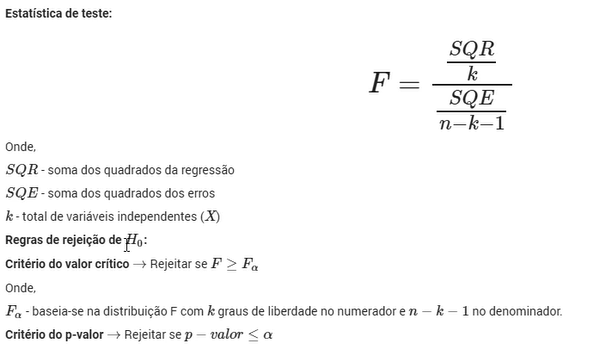

In [93]:
resultado_regressao.mse_model

31739163.242480807

In [94]:
resultado_regressao.mse_resid

20520.542448316486

In [95]:
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

1546.7019608482476

In [96]:
resultado_regressao.fvalue

1546.7019608482476

In [97]:
#pvalor
resultado_regressao.pvalues[1]

3.5555432285859883e-38

In [98]:
#ou 
resultado_regressao.f_pvalue

3.5555432285859935e-38

In [99]:
#ou 
from scipy.stats import f
p_valor = f.sf(F, 1, 48)
p_valor

3.5555432285859935e-38

In [101]:
p_valor <= 0.05

True

In [103]:
#Outros testes:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           3.56e-38
Time:                        09:20:54   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

Normalidade dos resíduos: Omnibus

e outros que n mostrarei aqui.